# Simple Linear Regression

## Predict the maximum temperature taking input feature as the minimum temperature

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
# load dataset
dataset = pd.read_csv('Weather.csv')

c:\users\paulm\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3221: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
# exploratroy analysis
print(dataset.shape)

(119040, 31)


In [5]:
print(dataset.describe())

                 STA  WindGustSpd        MaxTemp        MinTemp  \
count  119040.000000   532.000000  119040.000000  119040.000000   
mean    29659.435795    37.774534      27.045111      17.789511   
std     20953.209402    10.297808       8.717817       8.334572   
min     10001.000000    18.520000     -33.333333     -38.333333   
25%     11801.000000    29.632000      25.555556      15.000000   
50%     22508.000000    37.040000      29.444444      21.111111   
75%     33501.000000    43.059000      31.666667      23.333333   
max     82506.000000    75.932000      50.000000      34.444444   

            MeanTemp             YR             MO             DA          DR  \
count  119040.000000  119040.000000  119040.000000  119040.000000  533.000000   
mean       22.411631      43.805284       6.726016      15.797530   26.998124   
std         8.297982       1.136718       3.425561       8.794541   15.221732   
min       -35.555556      40.000000       1.000000       1.000000    2.0

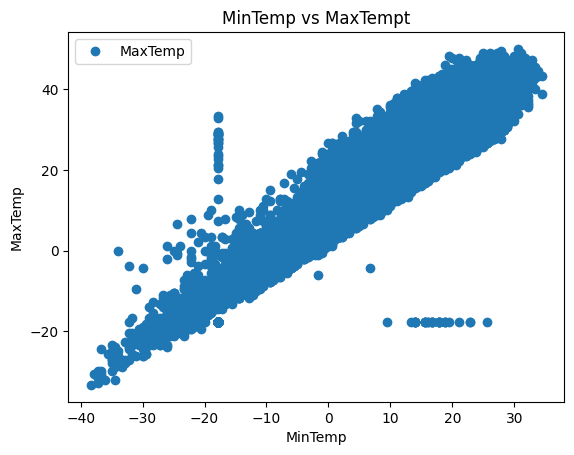

In [8]:
# plot data points of both variables
dataset.plot(x='MinTemp', y='MaxTemp', style='o')
plt.title('MinTemp vs MaxTempt')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

c:\users\paulm\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MaxTemp', ylabel='Density'>

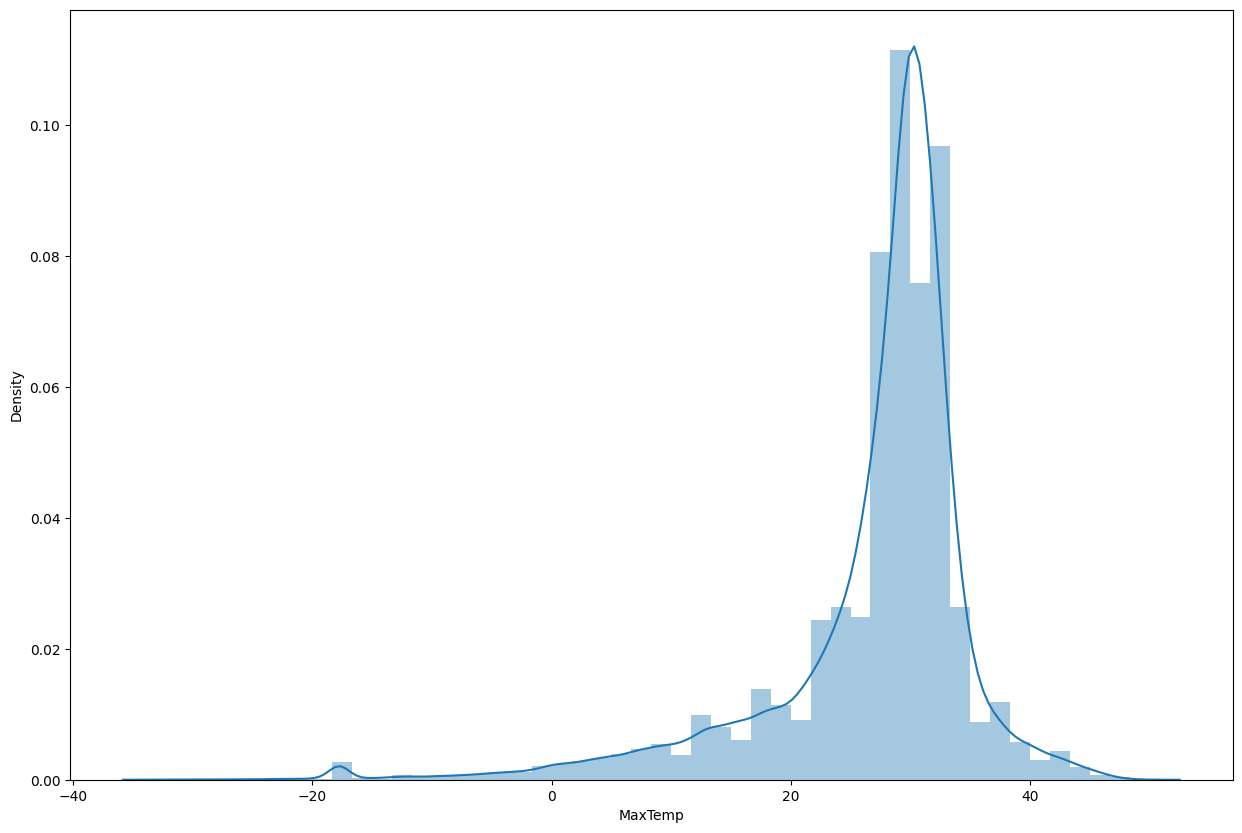

In [9]:
# create distribution plot of x variable
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['MaxTemp'])

In [10]:
# assign 'MinTemp' as attribute set, and 'MaxTemp' as label set
X = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)

In [11]:
# create train and test variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
# train linear regression model

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [15]:
# retrieve the intercept:
print(regressor.intercept_)
# retrieve the slope:
print(regressor.coef_)

[10.66185201]
[[0.92033997]]


For every one unit of change in Min temperature, the change in the Max temperature is about 0.92%.

In [16]:
# test our model
y_pred = regressor.predict(X_test)

In [17]:
# compare results from our test with the actual max temps
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted':y_pred.flatten()})
print(df.head(10))

      Actual  Predicted
0  28.888889  33.670351
1  31.111111  30.091251
2  27.222222  26.512151
3  28.888889  31.113851
4  23.333333  15.774852
5  37.222222  30.602551
6  22.222222  11.684452
7  35.555556  33.670351
8  30.555556  30.602551
9  28.888889  32.647751


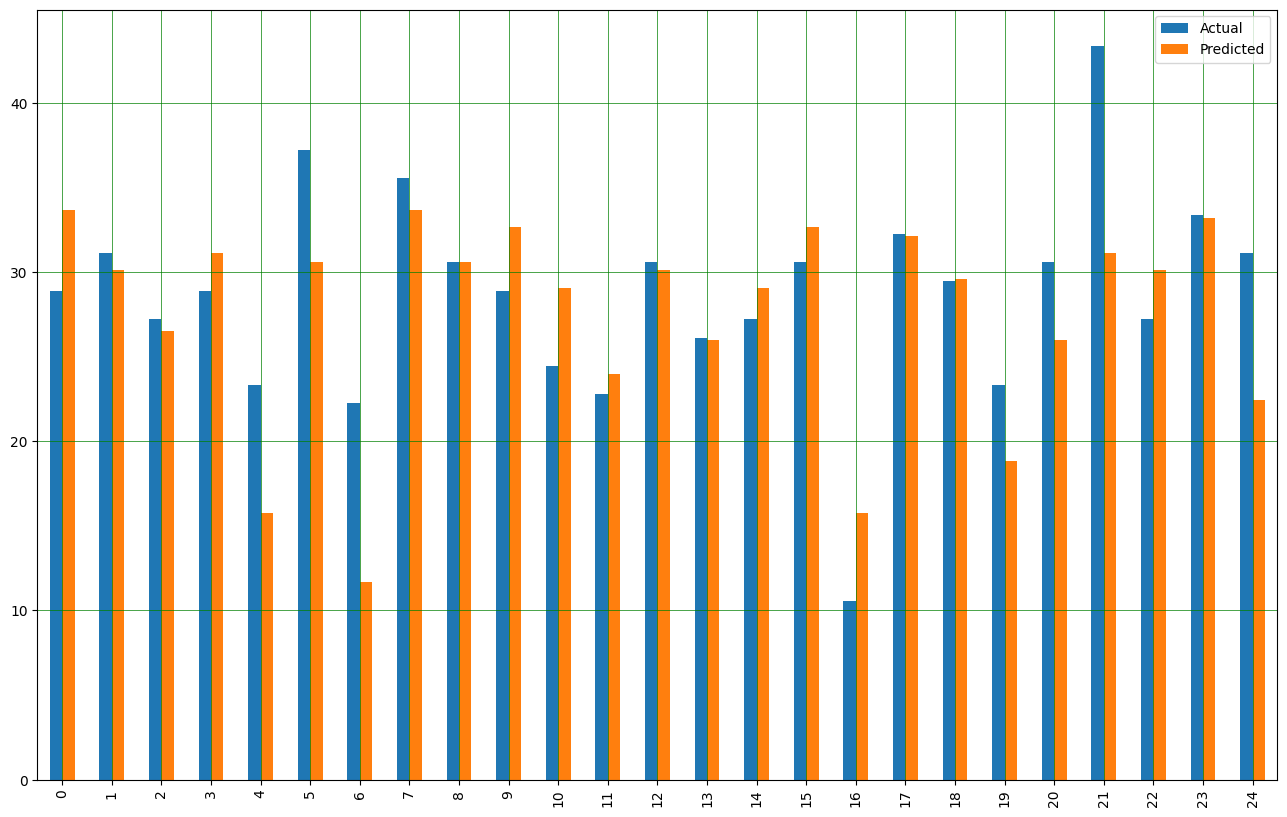

In [18]:
# visualise our test results for the first 25 records
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

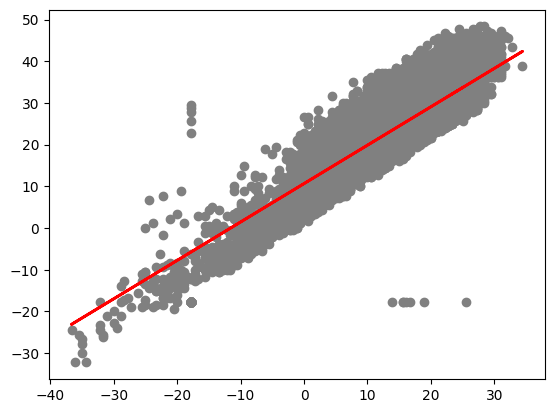

In [19]:
# plot the test data as a straight line
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [22]:
# evaluate our model by calculating the Mean Absolute Error, 
# Mean Squared Error and Root Mean suared Error 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',
np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.1993291783785835
Mean Squared Error: 17.631568097568532
Root Mean Squared Error: 4.198996082109215


The value of root mean squared error is 4.19, which is more than 10% of the mean value of the percentages of all the temperature i.e. 22.41. This means that our algorithm was not very accurate but can still make reasonably good predictions.